In [1]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd

In [3]:
def remove_stopwords(corpus, stopwords=[None]) :
    return [' '.join([word for word in sent.split() if word not in stopwords]) for sent in corpus]

In [8]:
stopwords = ["is", "a", "will", "the", "be"]
corpus = remove_stopwords(corpus, stopwords=stopwords)
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

In [11]:
word2index = tokenizer.word_index
word2index

{'young': 1,
 'king': 2,
 'man': 3,
 'queen': 4,
 'woman': 5,
 'strong': 6,
 'boy': 7,
 'girl': 8,
 'prince': 9,
 'princess': 10,
 'wise': 11,
 'pretty': 12}

In [45]:
skipgram_list = []
labels = []
for seq in sequences :
    skipgram, label = skipgrams(seq,vocabulary_size=len(word2index), negative_samples=0, window_size=2)
    skipgram_list.extend(skipgram)

In [48]:
skipgram_df = pd.DataFrame(skipgram_list, columns=['center', 'neighbor'])
skipgram_df.head()

center  neighbor
0       3         6
1       2         6
2       6         2
3       2         3
4       3         2

In [49]:
X_train = to_categorical(skipgram_df['center'])[:,1:]
y_train = to_categorical(skipgram_df['neighbor'])[:,1:]

In [50]:
print(X_train.shape)
print(y_train.shape)

(52, 12)
(52, 12)


In [51]:
#모델링
ONE_HOT_DIM = X_train.shape[-1]
EMBED_DIM = 2
model = Sequential()
model.add(Dense(EMBED_DIM, input_shape=(ONE_HOT_DIM,)))
model.add(Dense(ONE_HOT_DIM, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 26        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                36        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [53]:
model.fit(X_train,y_train, epochs=20000)

Epoch 1/20000
52/52 [==============================] - 0s 2ms/sample - loss: 2.5332 - acc: 0.0577
Epoch 2/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.5288 - acc: 0.0577
Epoch 3/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.5260 - acc: 0.0577
Epoch 4/20000
52/52 [==============================] - 0s 231us/sample - loss: 2.5238 - acc: 0.0577
Epoch 5/20000
52/52 [==============================] - 0s 211us/sample - loss: 2.5217 - acc: 0.0577
Epoch 6/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.5198 - acc: 0.0577
Epoch 7/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.5179 - acc: 0.0577
Epoch 8/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.5163 - acc: 0.0577
Epoch 9/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.5144 - acc: 0.0577
Epoch 10/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.5130 - acc: 0.0577
E

52/52 [==============================] - 0s 192us/sample - loss: 2.3378 - acc: 0.1538
Epoch 162/20000
52/52 [==============================] - 0s 192us/sample - loss: 2.3368 - acc: 0.1538
Epoch 163/20000
52/52 [==============================] - 0s 192us/sample - loss: 2.3359 - acc: 0.1538
Epoch 164/20000
52/52 [==============================] - 0s 192us/sample - loss: 2.3347 - acc: 0.1538
Epoch 165/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.3336 - acc: 0.1538
Epoch 166/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.3327 - acc: 0.1538
Epoch 167/20000
52/52 [==============================] - 0s 231us/sample - loss: 2.3316 - acc: 0.1538
Epoch 168/20000
52/52 [==============================] - 0s 231us/sample - loss: 2.3304 - acc: 0.1538
Epoch 169/20000
52/52 [==============================] - 0s 250us/sample - loss: 2.3296 - acc: 0.1538
Epoch 170/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.3283 - acc: 0.1

52/52 [==============================] - 0s 231us/sample - loss: 2.2557 - acc: 0.1731
Epoch 242/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.2550 - acc: 0.1731
Epoch 243/20000
52/52 [==============================] - 0s 192us/sample - loss: 2.2539 - acc: 0.1731
Epoch 244/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.2527 - acc: 0.1731
Epoch 245/20000
52/52 [==============================] - 0s 173us/sample - loss: 2.2518 - acc: 0.1731
Epoch 246/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.2508 - acc: 0.1731
Epoch 247/20000
52/52 [==============================] - 0s 192us/sample - loss: 2.2499 - acc: 0.1731
Epoch 248/20000
52/52 [==============================] - 0s 192us/sample - loss: 2.2489 - acc: 0.1731
Epoch 249/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.2479 - acc: 0.1731
Epoch 250/20000
52/52 [==============================] - 0s 231us/sample - loss: 2.2469 - acc: 0.1

52/52 [==============================] - 0s 250us/sample - loss: 2.1136 - acc: 0.2308
Epoch 401/20000
52/52 [==============================] - 0s 231us/sample - loss: 2.1131 - acc: 0.2308
Epoch 402/20000
52/52 [==============================] - 0s 250us/sample - loss: 2.1119 - acc: 0.2308
Epoch 403/20000
52/52 [==============================] - 0s 211us/sample - loss: 2.1112 - acc: 0.2308
Epoch 404/20000
52/52 [==============================] - 0s 231us/sample - loss: 2.1102 - acc: 0.2308
Epoch 405/20000
52/52 [==============================] - 0s 192us/sample - loss: 2.1096 - acc: 0.2308
Epoch 406/20000
52/52 [==============================] - 0s 192us/sample - loss: 2.1087 - acc: 0.2308
Epoch 407/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.1079 - acc: 0.2308
Epoch 408/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.1073 - acc: 0.2308
Epoch 409/20000
52/52 [==============================] - 0s 192us/sample - loss: 2.1066 - acc: 0.2

52/52 [==============================] - 0s 231us/sample - loss: 2.0120 - acc: 0.2115
Epoch 559/20000
52/52 [==============================] - 0s 231us/sample - loss: 2.0112 - acc: 0.2115
Epoch 560/20000
52/52 [==============================] - 0s 231us/sample - loss: 2.0106 - acc: 0.2115
Epoch 561/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.0099 - acc: 0.2115
Epoch 562/20000
52/52 [==============================] - 0s 211us/sample - loss: 2.0095 - acc: 0.2115
Epoch 563/20000
52/52 [==============================] - 0s 211us/sample - loss: 2.0089 - acc: 0.2115
Epoch 564/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.0087 - acc: 0.2115
Epoch 565/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.0080 - acc: 0.2115
Epoch 566/20000
52/52 [==============================] - 0s 211us/sample - loss: 2.0073 - acc: 0.2115
Epoch 567/20000
52/52 [==============================] - 0s 212us/sample - loss: 2.0071 - acc: 0.2

52/52 [==============================] - 0s 192us/sample - loss: 1.9427 - acc: 0.2500
Epoch 719/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.9421 - acc: 0.2500
Epoch 720/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.9417 - acc: 0.2500
Epoch 721/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.9412 - acc: 0.2500
Epoch 722/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.9408 - acc: 0.2500
Epoch 723/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.9406 - acc: 0.2500
Epoch 724/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.9402 - acc: 0.2500
Epoch 725/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.9403 - acc: 0.2500
Epoch 726/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.9399 - acc: 0.2500
Epoch 727/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.9392 - acc: 0.2

52/52 [==============================] - 0s 211us/sample - loss: 1.8962 - acc: 0.2500
Epoch 879/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8961 - acc: 0.2500
Epoch 880/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8956 - acc: 0.2500
Epoch 881/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.8952 - acc: 0.2500
Epoch 882/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8948 - acc: 0.2500
Epoch 883/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8948 - acc: 0.2500
Epoch 884/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8945 - acc: 0.2500
Epoch 885/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.8942 - acc: 0.2500
Epoch 886/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8942 - acc: 0.2500
Epoch 887/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8936 - acc: 0.2

52/52 [==============================] - 0s 212us/sample - loss: 1.8618 - acc: 0.2308
Epoch 1037/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8622 - acc: 0.2308
Epoch 1038/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8618 - acc: 0.2308
Epoch 1039/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8617 - acc: 0.2308
Epoch 1040/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8616 - acc: 0.2308
Epoch 1041/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8615 - acc: 0.2308
Epoch 1042/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8611 - acc: 0.2308
Epoch 1043/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.8609 - acc: 0.2308
Epoch 1044/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8609 - acc: 0.2308
Epoch 1045/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8604 -

52/52 [==============================] - 0s 212us/sample - loss: 1.8350 - acc: 0.2308
Epoch 1195/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8349 - acc: 0.2308
Epoch 1196/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8345 - acc: 0.2308
Epoch 1197/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.8347 - acc: 0.2308
Epoch 1198/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8345 - acc: 0.2308
Epoch 1199/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.8342 - acc: 0.2308
Epoch 1200/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8342 - acc: 0.2308
Epoch 1201/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.8341 - acc: 0.2308
Epoch 1202/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.8339 - acc: 0.2308
Epoch 1203/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8340 -

52/52 [==============================] - 0s 173us/sample - loss: 1.8127 - acc: 0.2308
Epoch 1352/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8127 - acc: 0.2308
Epoch 1353/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8123 - acc: 0.2308
Epoch 1354/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8127 - acc: 0.2308
Epoch 1355/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.8123 - acc: 0.2308
Epoch 1356/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8122 - acc: 0.2308
Epoch 1357/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8121 - acc: 0.2308
Epoch 1358/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.8118 - acc: 0.2308
Epoch 1359/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.8116 - acc: 0.2308
Epoch 1360/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.8116 -

52/52 [==============================] - 0s 231us/sample - loss: 1.7946 - acc: 0.2308
Epoch 1510/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7946 - acc: 0.2308
Epoch 1511/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7944 - acc: 0.2308
Epoch 1512/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7940 - acc: 0.2308
Epoch 1513/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7938 - acc: 0.2308
Epoch 1514/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7939 - acc: 0.2308
Epoch 1515/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7940 - acc: 0.2308
Epoch 1516/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7938 - acc: 0.2308
Epoch 1517/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7937 - acc: 0.2308
Epoch 1518/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7938 -

52/52 [==============================] - 0s 212us/sample - loss: 1.7809 - acc: 0.2500
Epoch 1668/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7805 - acc: 0.2500
Epoch 1669/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7801 - acc: 0.2500
Epoch 1670/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7806 - acc: 0.2500
Epoch 1671/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7799 - acc: 0.2500
Epoch 1672/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7802 - acc: 0.2500
Epoch 1673/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7800 - acc: 0.2500
Epoch 1674/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7799 - acc: 0.2500
Epoch 1675/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7797 - acc: 0.2500
Epoch 1676/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7799 -

Epoch 1825/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7698 - acc: 0.2500
Epoch 1826/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7694 - acc: 0.2500
Epoch 1827/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7692 - acc: 0.2500
Epoch 1828/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7694 - acc: 0.2500
Epoch 1829/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7695 - acc: 0.2500
Epoch 1830/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7691 - acc: 0.2500
Epoch 1831/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7694 - acc: 0.2500
Epoch 1832/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7692 - acc: 0.2500
Epoch 1833/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7695 - acc: 0.2500
Epoch 1834/20000
52/52 [==============================] - 0s 212us/sample

Epoch 1983/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7605 - acc: 0.2308
Epoch 1984/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7603 - acc: 0.2500
Epoch 1985/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7606 - acc: 0.2500
Epoch 1986/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7602 - acc: 0.2500
Epoch 1987/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7608 - acc: 0.2500
Epoch 1988/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7605 - acc: 0.2500
Epoch 1989/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7604 - acc: 0.2500
Epoch 1990/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7604 - acc: 0.2500
Epoch 1991/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7604 - acc: 0.2500
Epoch 1992/20000
52/52 [==============================] - 0s 192us/sample

52/52 [==============================] - 0s 212us/sample - loss: 1.7534 - acc: 0.2308
Epoch 2142/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7534 - acc: 0.2308
Epoch 2143/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7530 - acc: 0.2308
Epoch 2144/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7531 - acc: 0.2500
Epoch 2145/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7530 - acc: 0.2500
Epoch 2146/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7532 - acc: 0.2500
Epoch 2147/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7529 - acc: 0.2308
Epoch 2148/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7529 - acc: 0.2500
Epoch 2149/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7528 - acc: 0.2500
Epoch 2150/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7527 -

52/52 [==============================] - 0s 192us/sample - loss: 1.7463 - acc: 0.2500
Epoch 2299/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7465 - acc: 0.2500
Epoch 2300/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7466 - acc: 0.2500
Epoch 2301/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7464 - acc: 0.2500
Epoch 2302/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7468 - acc: 0.2500
Epoch 2303/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7465 - acc: 0.2500
Epoch 2304/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7461 - acc: 0.2500
Epoch 2305/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7462 - acc: 0.2500
Epoch 2306/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7459 - acc: 0.2500
Epoch 2307/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7461 -

Epoch 2456/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7411 - acc: 0.2500
Epoch 2457/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7406 - acc: 0.2500
Epoch 2458/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7407 - acc: 0.2500
Epoch 2459/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7408 - acc: 0.2308
Epoch 2460/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7405 - acc: 0.2308
Epoch 2461/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7408 - acc: 0.2500
Epoch 2462/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7411 - acc: 0.2500
Epoch 2463/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7406 - acc: 0.2500
Epoch 2464/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7404 - acc: 0.2500
Epoch 2465/20000
52/52 [==============================] - 0s 192us/sample

52/52 [==============================] - 0s 192us/sample - loss: 1.7361 - acc: 0.2500
Epoch 2615/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7360 - acc: 0.2500
Epoch 2616/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7357 - acc: 0.2500
Epoch 2617/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7359 - acc: 0.2500
Epoch 2618/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7360 - acc: 0.2500
Epoch 2619/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7354 - acc: 0.2308
Epoch 2620/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7358 - acc: 0.2500
Epoch 2621/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7357 - acc: 0.2500
Epoch 2622/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7357 - acc: 0.2500
Epoch 2623/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7359 -

Epoch 2693/20000
52/52 [==============================] - ETA: 0s - loss: 1.8412 - acc: 0.218 - 0s 231us/sample - loss: 1.7335 - acc: 0.2500
Epoch 2694/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7335 - acc: 0.2500
Epoch 2695/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7335 - acc: 0.2500
Epoch 2696/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7339 - acc: 0.2500
Epoch 2697/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7335 - acc: 0.2500
Epoch 2698/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.7339 - acc: 0.2500
Epoch 2699/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7336 - acc: 0.2308
Epoch 2700/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7331 - acc: 0.2500
Epoch 2701/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7334 - acc: 0.2500
Epoch 2702/20000
52/52 [===========

Epoch 2850/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7297 - acc: 0.2500
Epoch 2851/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7298 - acc: 0.2500
Epoch 2852/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7300 - acc: 0.2500
Epoch 2853/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7300 - acc: 0.2500
Epoch 2854/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7297 - acc: 0.2500
Epoch 2855/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7295 - acc: 0.2500
Epoch 2856/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7294 - acc: 0.2500
Epoch 2857/20000
52/52 [==============================] - ETA: 0s - loss: 1.7488 - acc: 0.250 - 0s 231us/sample - loss: 1.7295 - acc: 0.2500
Epoch 2858/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7297 - acc: 0.2500
Epoch 2859/20000
52/52 [===========

Epoch 3007/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7262 - acc: 0.2692
Epoch 3008/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7263 - acc: 0.2692
Epoch 3009/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7265 - acc: 0.2692
Epoch 3010/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7264 - acc: 0.2500
Epoch 3011/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7264 - acc: 0.2500
Epoch 3012/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7261 - acc: 0.2500
Epoch 3013/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7262 - acc: 0.2692
Epoch 3014/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7261 - acc: 0.2692
Epoch 3015/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7262 - acc: 0.2692
Epoch 3016/20000
52/52 [==============================] - 0s 211us/sample

Epoch 3165/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7237 - acc: 0.2500
Epoch 3166/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7237 - acc: 0.2500
Epoch 3167/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7233 - acc: 0.2500
Epoch 3168/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7240 - acc: 0.2500
Epoch 3169/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7236 - acc: 0.2308
Epoch 3170/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7233 - acc: 0.2500
Epoch 3171/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7232 - acc: 0.2500
Epoch 3172/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7236 - acc: 0.2500
Epoch 3173/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7234 - acc: 0.2500
Epoch 3174/20000
52/52 [==============================] - 0s 231us/sample

52/52 [==============================] - 0s 231us/sample - loss: 1.7209 - acc: 0.2500
Epoch 3324/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7213 - acc: 0.2500
Epoch 3325/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7206 - acc: 0.2500
Epoch 3326/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7210 - acc: 0.2500
Epoch 3327/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7214 - acc: 0.2500
Epoch 3328/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7210 - acc: 0.2500
Epoch 3329/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7209 - acc: 0.2500
Epoch 3330/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7208 - acc: 0.2500
Epoch 3331/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7206 - acc: 0.2500
Epoch 3332/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7205 -

52/52 [==============================] - 0s 173us/sample - loss: 1.7189 - acc: 0.2500
Epoch 3482/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7189 - acc: 0.2500
Epoch 3483/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.7184 - acc: 0.2500
Epoch 3484/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7191 - acc: 0.2500
Epoch 3485/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7185 - acc: 0.2500
Epoch 3486/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7188 - acc: 0.2500
Epoch 3487/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7185 - acc: 0.2500
Epoch 3488/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7189 - acc: 0.2500
Epoch 3489/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7187 - acc: 0.2500
Epoch 3490/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7186 -

52/52 [==============================] - 0s 212us/sample - loss: 1.7169 - acc: 0.2500
Epoch 3640/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7165 - acc: 0.2500
Epoch 3641/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7169 - acc: 0.2500
Epoch 3642/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7167 - acc: 0.2500
Epoch 3643/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7170 - acc: 0.2500
Epoch 3644/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7168 - acc: 0.2500
Epoch 3645/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7170 - acc: 0.2500
Epoch 3646/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7169 - acc: 0.2500
Epoch 3647/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7167 - acc: 0.2500
Epoch 3648/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7164 -

Epoch 3718/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7167 - acc: 0.2500
Epoch 3719/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7160 - acc: 0.2500
Epoch 3720/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7160 - acc: 0.2500
Epoch 3721/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7157 - acc: 0.2500
Epoch 3722/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7161 - acc: 0.2308
Epoch 3723/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7156 - acc: 0.2500
Epoch 3724/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7158 - acc: 0.2500
Epoch 3725/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7160 - acc: 0.2500
Epoch 3726/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7163 - acc: 0.2500
Epoch 3727/20000
52/52 [==============================] - 0s 211us/sample

52/52 [==============================] - 0s 212us/sample - loss: 1.7140 - acc: 0.2500
Epoch 3877/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7140 - acc: 0.2500
Epoch 3878/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7146 - acc: 0.2500
Epoch 3879/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.7140 - acc: 0.2500
Epoch 3880/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7144 - acc: 0.2500
Epoch 3881/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7140 - acc: 0.2500
Epoch 3882/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7139 - acc: 0.2500
Epoch 3883/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7143 - acc: 0.2500
Epoch 3884/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7143 - acc: 0.2500
Epoch 3885/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7145 -

Epoch 4033/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.7134 - acc: 0.2500
Epoch 4034/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7135 - acc: 0.2500
Epoch 4035/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7123 - acc: 0.2500
Epoch 4036/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7125 - acc: 0.2500
Epoch 4037/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7127 - acc: 0.2308
Epoch 4038/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7125 - acc: 0.2500
Epoch 4039/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7125 - acc: 0.2500
Epoch 4040/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7127 - acc: 0.2500
Epoch 4041/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7126 - acc: 0.2308
Epoch 4042/20000
52/52 [==============================] - 0s 212us/sample

Epoch 4191/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7112 - acc: 0.2308
Epoch 4192/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7118 - acc: 0.2500
Epoch 4193/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7114 - acc: 0.2500
Epoch 4194/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7109 - acc: 0.2500
Epoch 4195/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7111 - acc: 0.2500
Epoch 4196/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7114 - acc: 0.2500
Epoch 4197/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7117 - acc: 0.2500
Epoch 4198/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7117 - acc: 0.2308
Epoch 4199/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7112 - acc: 0.2308
Epoch 4200/20000
52/52 [==============================] - 0s 211us/sample

52/52 [==============================] - 0s 192us/sample - loss: 1.7096 - acc: 0.2500
Epoch 4348/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7099 - acc: 0.2308
Epoch 4349/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7099 - acc: 0.2308
Epoch 4350/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7096 - acc: 0.2500
Epoch 4351/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7096 - acc: 0.2500
Epoch 4352/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7102 - acc: 0.2500
Epoch 4353/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7099 - acc: 0.2500
Epoch 4354/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7101 - acc: 0.2500
Epoch 4355/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7097 - acc: 0.2500
Epoch 4356/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7096 -

Epoch 4426/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7093 - acc: 0.2500
Epoch 4427/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7090 - acc: 0.2500
Epoch 4428/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7093 - acc: 0.2500
Epoch 4429/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7092 - acc: 0.2500
Epoch 4430/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7091 - acc: 0.2500
Epoch 4431/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7087 - acc: 0.2500
Epoch 4432/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7091 - acc: 0.2500
Epoch 4433/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7091 - acc: 0.2500
Epoch 4434/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7092 - acc: 0.2500
Epoch 4435/20000
52/52 [==============================] - 0s 212us/sample

Epoch 4584/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7075 - acc: 0.2308
Epoch 4585/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7079 - acc: 0.2308
Epoch 4586/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7077 - acc: 0.2500
Epoch 4587/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7077 - acc: 0.2500
Epoch 4588/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7076 - acc: 0.2500
Epoch 4589/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7075 - acc: 0.2500
Epoch 4590/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7077 - acc: 0.2500
Epoch 4591/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7074 - acc: 0.2500
Epoch 4592/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7076 - acc: 0.2500
Epoch 4593/20000
52/52 [==============================] - 0s 212us/sample

52/52 [==============================] - 0s 231us/sample - loss: 1.7063 - acc: 0.2500
Epoch 4743/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7061 - acc: 0.2500
Epoch 4744/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.7063 - acc: 0.2308
Epoch 4745/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.7065 - acc: 0.2500
Epoch 4746/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7061 - acc: 0.2308
Epoch 4747/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7063 - acc: 0.2500
Epoch 4748/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7062 - acc: 0.2500
Epoch 4749/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7067 - acc: 0.2500
Epoch 4750/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7063 - acc: 0.2500
Epoch 4751/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7060 -

52/52 [==============================] - 0s 250us/sample - loss: 1.7056 - acc: 0.2500
Epoch 4900/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.7046 - acc: 0.2500
Epoch 4901/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7045 - acc: 0.2500
Epoch 4902/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7045 - acc: 0.2500
Epoch 4903/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7051 - acc: 0.2500
Epoch 4904/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7046 - acc: 0.2500
Epoch 4905/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7047 - acc: 0.2308
Epoch 4906/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7046 - acc: 0.2500
Epoch 4907/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7046 - acc: 0.2500
Epoch 4908/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7044 -

Epoch 5057/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7032 - acc: 0.2500
Epoch 5058/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.7033 - acc: 0.2500
Epoch 5059/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7033 - acc: 0.2308
Epoch 5060/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7029 - acc: 0.2500
Epoch 5061/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7032 - acc: 0.2500
Epoch 5062/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7033 - acc: 0.2500
Epoch 5063/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7031 - acc: 0.2500
Epoch 5064/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7032 - acc: 0.2500
Epoch 5065/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7025 - acc: 0.2500
Epoch 5066/20000
52/52 [==============================] - 0s 192us/sample

52/52 [==============================] - 0s 212us/sample - loss: 1.7012 - acc: 0.2500
Epoch 5215/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7014 - acc: 0.2500
Epoch 5216/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7016 - acc: 0.2500
Epoch 5217/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.7015 - acc: 0.2500
Epoch 5218/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7018 - acc: 0.2500
Epoch 5219/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.7011 - acc: 0.2500
Epoch 5220/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7011 - acc: 0.2500
Epoch 5221/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.7010 - acc: 0.2500
Epoch 5222/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.7014 - acc: 0.2500
Epoch 5223/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7015 -

52/52 [==============================] - 0s 192us/sample - loss: 1.6997 - acc: 0.2500
Epoch 5373/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6998 - acc: 0.2500
Epoch 5374/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6998 - acc: 0.2500
Epoch 5375/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6997 - acc: 0.2500
Epoch 5376/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6995 - acc: 0.2500
Epoch 5377/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6998 - acc: 0.2500
Epoch 5378/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.7003 - acc: 0.2500
Epoch 5379/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6996 - acc: 0.2500
Epoch 5380/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6995 - acc: 0.2500
Epoch 5381/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6995 -

Epoch 5530/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6977 - acc: 0.2500
Epoch 5531/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6982 - acc: 0.2500
Epoch 5532/20000
52/52 [==============================] - 0s 269us/sample - loss: 1.6978 - acc: 0.2500
Epoch 5533/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6978 - acc: 0.2500
Epoch 5534/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6981 - acc: 0.2500
Epoch 5535/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6976 - acc: 0.2500
Epoch 5536/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6979 - acc: 0.2500
Epoch 5537/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6979 - acc: 0.2500
Epoch 5538/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6981 - acc: 0.2500
Epoch 5539/20000
52/52 [==============================] - 0s 231us/sample

52/52 [==============================] - 0s 231us/sample - loss: 1.6957 - acc: 0.2500
Epoch 5688/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6964 - acc: 0.2500
Epoch 5689/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6964 - acc: 0.2500
Epoch 5690/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6959 - acc: 0.2308
Epoch 5691/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6963 - acc: 0.2500
Epoch 5692/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6958 - acc: 0.2500
Epoch 5693/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6959 - acc: 0.2308
Epoch 5694/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6959 - acc: 0.2500
Epoch 5695/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6958 - acc: 0.2500
Epoch 5696/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6962 -

Epoch 5845/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6939 - acc: 0.2500
Epoch 5846/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6943 - acc: 0.2500
Epoch 5847/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6941 - acc: 0.2500
Epoch 5848/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6939 - acc: 0.2500
Epoch 5849/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6942 - acc: 0.2308
Epoch 5850/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6944 - acc: 0.2500
Epoch 5851/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6937 - acc: 0.2500
Epoch 5852/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6939 - acc: 0.2500
Epoch 5853/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6938 - acc: 0.2500
Epoch 5854/20000
52/52 [==============================] - 0s 212us/sample

Epoch 6002/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6921 - acc: 0.2500
Epoch 6003/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6922 - acc: 0.2500
Epoch 6004/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6923 - acc: 0.2500
Epoch 6005/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6923 - acc: 0.2500
Epoch 6006/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6921 - acc: 0.2500
Epoch 6007/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6925 - acc: 0.2500
Epoch 6008/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6921 - acc: 0.2500
Epoch 6009/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6923 - acc: 0.2500
Epoch 6010/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6918 - acc: 0.2500
Epoch 6011/20000
52/52 [==============================] - 0s 212us/sample

52/52 [==============================] - 0s 211us/sample - loss: 1.6905 - acc: 0.2500
Epoch 6161/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6899 - acc: 0.2500
Epoch 6162/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6903 - acc: 0.2500
Epoch 6163/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6903 - acc: 0.2500
Epoch 6164/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6898 - acc: 0.2500
Epoch 6165/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6905 - acc: 0.2500
Epoch 6166/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6906 - acc: 0.2500
Epoch 6167/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6900 - acc: 0.2500
Epoch 6168/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6904 - acc: 0.2500
Epoch 6169/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6901 -

Epoch 6239/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6892 - acc: 0.2500
Epoch 6240/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6898 - acc: 0.2500
Epoch 6241/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6893 - acc: 0.2500
Epoch 6242/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6894 - acc: 0.2500
Epoch 6243/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6897 - acc: 0.2500
Epoch 6244/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6894 - acc: 0.2500
Epoch 6245/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6897 - acc: 0.2500
Epoch 6246/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6890 - acc: 0.2500
Epoch 6247/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6892 - acc: 0.2500
Epoch 6248/20000
52/52 [==============================] - 0s 192us/sample

52/52 [==============================] - 0s 192us/sample - loss: 1.6876 - acc: 0.2500
Epoch 6398/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6874 - acc: 0.2692
Epoch 6399/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6875 - acc: 0.2500
Epoch 6400/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6878 - acc: 0.2500
Epoch 6401/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6873 - acc: 0.2500
Epoch 6402/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6877 - acc: 0.2500
Epoch 6403/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6877 - acc: 0.2308
Epoch 6404/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6874 - acc: 0.2500
Epoch 6405/20000
52/52 [==============================] - ETA: 0s - loss: 1.7061 - acc: 0.218 - 0s 211us/sample - loss: 1.6878 - acc: 0.2500
Epoch 6406/20000
52/52 [============================

52/52 [==============================] - 0s 192us/sample - loss: 1.6859 - acc: 0.2500
Epoch 6555/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6857 - acc: 0.2500
Epoch 6556/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6863 - acc: 0.2500
Epoch 6557/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6862 - acc: 0.2500
Epoch 6558/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6857 - acc: 0.2500
Epoch 6559/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6857 - acc: 0.2500
Epoch 6560/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6859 - acc: 0.2500
Epoch 6561/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6859 - acc: 0.2885
Epoch 6562/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6860 - acc: 0.2308
Epoch 6563/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6859 -

52/52 [==============================] - 0s 192us/sample - loss: 1.6841 - acc: 0.2692
Epoch 6713/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6842 - acc: 0.2500
Epoch 6714/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6840 - acc: 0.2500
Epoch 6715/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6840 - acc: 0.2500
Epoch 6716/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6841 - acc: 0.2500
Epoch 6717/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6843 - acc: 0.2885
Epoch 6718/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6842 - acc: 0.2500
Epoch 6719/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6844 - acc: 0.2500
Epoch 6720/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6847 - acc: 0.2500
Epoch 6721/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6842 -

52/52 [==============================] - 0s 192us/sample - loss: 1.6829 - acc: 0.2692
Epoch 6870/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6835 - acc: 0.2885
Epoch 6871/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6828 - acc: 0.2500
Epoch 6872/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6830 - acc: 0.2885
Epoch 6873/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6828 - acc: 0.2885
Epoch 6874/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6827 - acc: 0.2308
Epoch 6875/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6829 - acc: 0.2500
Epoch 6876/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6826 - acc: 0.2885
Epoch 6877/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6832 - acc: 0.2692
Epoch 6878/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6827 -

52/52 [==============================] - 0s 212us/sample - loss: 1.6814 - acc: 0.2885
Epoch 7028/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6815 - acc: 0.2885
Epoch 7029/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6810 - acc: 0.2885
Epoch 7030/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6813 - acc: 0.2885
Epoch 7031/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6814 - acc: 0.2885
Epoch 7032/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6819 - acc: 0.2885
Epoch 7033/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6811 - acc: 0.2885
Epoch 7034/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6813 - acc: 0.2885
Epoch 7035/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6814 - acc: 0.2885
Epoch 7036/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6817 -

52/52 [==============================] - 0s 192us/sample - loss: 1.6802 - acc: 0.2885
Epoch 7185/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6802 - acc: 0.2885
Epoch 7186/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6801 - acc: 0.2885
Epoch 7187/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6800 - acc: 0.2885
Epoch 7188/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6806 - acc: 0.2885
Epoch 7189/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6801 - acc: 0.2885
Epoch 7190/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6801 - acc: 0.2885
Epoch 7191/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6800 - acc: 0.2885
Epoch 7192/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6803 - acc: 0.2692
Epoch 7193/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6799 -

52/52 [==============================] - 0s 192us/sample - loss: 1.6796 - acc: 0.2885
Epoch 7342/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6785 - acc: 0.2885
Epoch 7343/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6787 - acc: 0.2885
Epoch 7344/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6790 - acc: 0.2885
Epoch 7345/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6786 - acc: 0.2885
Epoch 7346/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6786 - acc: 0.2885
Epoch 7347/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6792 - acc: 0.2885
Epoch 7348/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6791 - acc: 0.2885
Epoch 7349/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6787 - acc: 0.2885
Epoch 7350/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6788 -

52/52 [==============================] - 0s 192us/sample - loss: 1.6779 - acc: 0.2885
Epoch 7500/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6777 - acc: 0.2885
Epoch 7501/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6776 - acc: 0.2692
Epoch 7502/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6777 - acc: 0.2885
Epoch 7503/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6775 - acc: 0.2885
Epoch 7504/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6780 - acc: 0.2885
Epoch 7505/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6783 - acc: 0.2692
Epoch 7506/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6776 - acc: 0.2885
Epoch 7507/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6774 - acc: 0.2885
Epoch 7508/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6778 -

52/52 [==============================] - 0s 212us/sample - loss: 1.6766 - acc: 0.2885
Epoch 7656/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6770 - acc: 0.2692
Epoch 7657/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6768 - acc: 0.2885
Epoch 7658/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6767 - acc: 0.2885
Epoch 7659/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6767 - acc: 0.2885
Epoch 7660/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6764 - acc: 0.2885
Epoch 7661/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6768 - acc: 0.2885
Epoch 7662/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6762 - acc: 0.2885
Epoch 7663/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6770 - acc: 0.2885
Epoch 7664/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6764 -

52/52 [==============================] - 0s 192us/sample - loss: 1.6759 - acc: 0.2885
Epoch 7813/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6756 - acc: 0.2885
Epoch 7814/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6754 - acc: 0.2885
Epoch 7815/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6754 - acc: 0.2885
Epoch 7816/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6759 - acc: 0.2885
Epoch 7817/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6756 - acc: 0.2885
Epoch 7818/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6758 - acc: 0.2885
Epoch 7819/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6753 - acc: 0.2885
Epoch 7820/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6755 - acc: 0.2885
Epoch 7821/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6756 -

Epoch 7891/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6749 - acc: 0.2885
Epoch 7892/20000
52/52 [==============================] - ETA: 0s - loss: 1.6963 - acc: 0.343 - 0s 192us/sample - loss: 1.6750 - acc: 0.2885
Epoch 7893/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6752 - acc: 0.2885
Epoch 7894/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6750 - acc: 0.2885
Epoch 7895/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6755 - acc: 0.2885
Epoch 7896/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6752 - acc: 0.2885
Epoch 7897/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6749 - acc: 0.2885
Epoch 7898/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6749 - acc: 0.2885
Epoch 7899/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6749 - acc: 0.2885
Epoch 7900/20000
52/52 [===========

52/52 [==============================] - 0s 192us/sample - loss: 1.6738 - acc: 0.2885
Epoch 8050/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6741 - acc: 0.2885
Epoch 8051/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6740 - acc: 0.2885
Epoch 8052/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6746 - acc: 0.2885
Epoch 8053/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6745 - acc: 0.2885
Epoch 8054/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6740 - acc: 0.2885
Epoch 8055/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6741 - acc: 0.2885
Epoch 8056/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6743 - acc: 0.2885
Epoch 8057/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6740 - acc: 0.2885
Epoch 8058/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6746 -

52/52 [==============================] - 0s 211us/sample - loss: 1.6733 - acc: 0.2885
Epoch 8208/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6737 - acc: 0.2885
Epoch 8209/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6731 - acc: 0.2885
Epoch 8210/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6734 - acc: 0.2885
Epoch 8211/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6730 - acc: 0.2885
Epoch 8212/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6733 - acc: 0.2885
Epoch 8213/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6732 - acc: 0.2885
Epoch 8214/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6738 - acc: 0.2885
Epoch 8215/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6731 - acc: 0.2885
Epoch 8216/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6730 -

Epoch 8365/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6725 - acc: 0.2885
Epoch 8366/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6722 - acc: 0.2885
Epoch 8367/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6722 - acc: 0.2885
Epoch 8368/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6725 - acc: 0.2885
Epoch 8369/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6721 - acc: 0.2885
Epoch 8370/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6725 - acc: 0.2885
Epoch 8371/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6722 - acc: 0.2885
Epoch 8372/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6722 - acc: 0.2885
Epoch 8373/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6725 - acc: 0.2885
Epoch 8374/20000
52/52 [==============================] - 0s 231us/sample

52/52 [==============================] - 0s 192us/sample - loss: 1.6718 - acc: 0.2885
Epoch 8524/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6714 - acc: 0.2885
Epoch 8525/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6714 - acc: 0.2885
Epoch 8526/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6714 - acc: 0.2885
Epoch 8527/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6714 - acc: 0.2692
Epoch 8528/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6720 - acc: 0.2885
Epoch 8529/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6720 - acc: 0.2885
Epoch 8530/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6716 - acc: 0.2885
Epoch 8531/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6716 - acc: 0.2885
Epoch 8532/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6714 -

Epoch 8681/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6709 - acc: 0.2885
Epoch 8682/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6709 - acc: 0.2885
Epoch 8683/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6711 - acc: 0.2885
Epoch 8684/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6710 - acc: 0.2885
Epoch 8685/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6708 - acc: 0.2885
Epoch 8686/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6708 - acc: 0.2885
Epoch 8687/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6710 - acc: 0.2885
Epoch 8688/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6705 - acc: 0.2885
Epoch 8689/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6709 - acc: 0.2885
Epoch 8690/20000
52/52 [==============================] - 0s 192us/sample

52/52 [==============================] - 0s 192us/sample - loss: 1.6702 - acc: 0.2885
Epoch 8839/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6706 - acc: 0.2885
Epoch 8840/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6700 - acc: 0.2885
Epoch 8841/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6706 - acc: 0.2885
Epoch 8842/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6700 - acc: 0.2885
Epoch 8843/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6699 - acc: 0.2885
Epoch 8844/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6700 - acc: 0.2885
Epoch 8845/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6706 - acc: 0.2885
Epoch 8846/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6697 - acc: 0.2885
Epoch 8847/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6705 -

52/52 [==============================] - 0s 231us/sample - loss: 1.6694 - acc: 0.2885
Epoch 8997/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6697 - acc: 0.2885
Epoch 8998/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6690 - acc: 0.2885
Epoch 8999/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6697 - acc: 0.2885
Epoch 9000/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6692 - acc: 0.2885
Epoch 9001/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6697 - acc: 0.2885
Epoch 9002/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6693 - acc: 0.2885
Epoch 9003/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6691 - acc: 0.2885
Epoch 9004/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6696 - acc: 0.2885
Epoch 9005/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6693 -

52/52 [==============================] - 0s 192us/sample - loss: 1.6686 - acc: 0.3077
Epoch 9155/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6686 - acc: 0.3077
Epoch 9156/20000
52/52 [==============================] - ETA: 0s - loss: 1.6741 - acc: 0.281 - 0s 192us/sample - loss: 1.6692 - acc: 0.3077
Epoch 9157/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6691 - acc: 0.3077
Epoch 9158/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6687 - acc: 0.3077
Epoch 9159/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6688 - acc: 0.3077
Epoch 9160/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6684 - acc: 0.3077
Epoch 9161/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6687 - acc: 0.3077
Epoch 9162/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6686 - acc: 0.3077
Epoch 9163/20000
52/52 [============================

Epoch 9233/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6687 - acc: 0.3077
Epoch 9234/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6689 - acc: 0.3077
Epoch 9235/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6690 - acc: 0.2885
Epoch 9236/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6680 - acc: 0.3077
Epoch 9237/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6683 - acc: 0.3077
Epoch 9238/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6682 - acc: 0.3077
Epoch 9239/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6685 - acc: 0.3077
Epoch 9240/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6690 - acc: 0.3077
Epoch 9241/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6683 - acc: 0.3077
Epoch 9242/20000
52/52 [==============================] - 0s 192us/sample

52/52 [==============================] - 0s 192us/sample - loss: 1.6680 - acc: 0.3077
Epoch 9392/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6683 - acc: 0.3077
Epoch 9393/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6677 - acc: 0.3077
Epoch 9394/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6680 - acc: 0.2885
Epoch 9395/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6680 - acc: 0.3077
Epoch 9396/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6678 - acc: 0.3077
Epoch 9397/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6676 - acc: 0.2885
Epoch 9398/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6675 - acc: 0.3077
Epoch 9399/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6680 - acc: 0.3077
Epoch 9400/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6676 -

52/52 [==============================] - 0s 212us/sample - loss: 1.6673 - acc: 0.3077
Epoch 9550/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6675 - acc: 0.3077
Epoch 9551/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6669 - acc: 0.3077
Epoch 9552/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6673 - acc: 0.3077
Epoch 9553/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6671 - acc: 0.3077
Epoch 9554/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6669 - acc: 0.3077
Epoch 9555/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6668 - acc: 0.3077
Epoch 9556/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6675 - acc: 0.3077
Epoch 9557/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6677 - acc: 0.3077
Epoch 9558/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6670 -

Epoch 9707/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6667 - acc: 0.3077
Epoch 9708/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6673 - acc: 0.3077
Epoch 9709/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6665 - acc: 0.3077
Epoch 9710/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6668 - acc: 0.3077
Epoch 9711/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6669 - acc: 0.3077
Epoch 9712/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6664 - acc: 0.3077
Epoch 9713/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6669 - acc: 0.3077
Epoch 9714/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6670 - acc: 0.3269
Epoch 9715/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6664 - acc: 0.3077
Epoch 9716/20000
52/52 [==============================] - 0s 212us/sample

52/52 [==============================] - 0s 212us/sample - loss: 1.6665 - acc: 0.3077
Epoch 9866/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6660 - acc: 0.3077
Epoch 9867/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6661 - acc: 0.3077
Epoch 9868/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6661 - acc: 0.3077
Epoch 9869/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6660 - acc: 0.3077
Epoch 9870/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6660 - acc: 0.3077
Epoch 9871/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6663 - acc: 0.3077
Epoch 9872/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6665 - acc: 0.3077
Epoch 9873/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6660 - acc: 0.3077
Epoch 9874/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6664 -

52/52 [==============================] - 0s 212us/sample - loss: 1.6653 - acc: 0.3077
Epoch 10024/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6657 - acc: 0.3077
Epoch 10025/20000
52/52 [==============================] - ETA: 0s - loss: 1.6106 - acc: 0.312 - 0s 212us/sample - loss: 1.6652 - acc: 0.3077
Epoch 10026/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6660 - acc: 0.3077
Epoch 10027/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6652 - acc: 0.3077
Epoch 10028/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6659 - acc: 0.3077
Epoch 10029/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6657 - acc: 0.3077
Epoch 10030/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6655 - acc: 0.3077
Epoch 10031/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6659 - acc: 0.3077
Epoch 10032/20000
52/52 [===================

Epoch 10180/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6654 - acc: 0.3077
Epoch 10181/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6650 - acc: 0.3077
Epoch 10182/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6650 - acc: 0.3077
Epoch 10183/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6651 - acc: 0.3077
Epoch 10184/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6650 - acc: 0.3077
Epoch 10185/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6647 - acc: 0.3077
Epoch 10186/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6651 - acc: 0.3077
Epoch 10187/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6649 - acc: 0.3077
Epoch 10188/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6651 - acc: 0.3077
Epoch 10189/20000
52/52 [==============================] - 0s 21

52/52 [==============================] - 0s 192us/sample - loss: 1.6646 - acc: 0.3077
Epoch 10337/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6644 - acc: 0.3077
Epoch 10338/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6645 - acc: 0.3077
Epoch 10339/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6643 - acc: 0.3077
Epoch 10340/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6649 - acc: 0.3077
Epoch 10341/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6644 - acc: 0.3077
Epoch 10342/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6640 - acc: 0.3077
Epoch 10343/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6648 - acc: 0.3077
Epoch 10344/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6645 - acc: 0.3077
Epoch 10345/20000
52/52 [==============================] - 0s 231us/sample - loss:

Epoch 10414/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6640 - acc: 0.3077
Epoch 10415/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6643 - acc: 0.3077
Epoch 10416/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6643 - acc: 0.3077
Epoch 10417/20000
52/52 [==============================] - ETA: 0s - loss: 1.6280 - acc: 0.343 - 0s 231us/sample - loss: 1.6641 - acc: 0.3077
Epoch 10418/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6647 - acc: 0.2885
Epoch 10419/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6644 - acc: 0.3077
Epoch 10420/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6647 - acc: 0.3077
Epoch 10421/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6641 - acc: 0.3077
Epoch 10422/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6647 - acc: 0.3077
Epoch 10423/20000
52/52 [=

Epoch 10571/20000
52/52 [==============================] - ETA: 0s - loss: 1.6181 - acc: 0.343 - 0s 212us/sample - loss: 1.6640 - acc: 0.3077
Epoch 10572/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6644 - acc: 0.3077
Epoch 10573/20000
52/52 [==============================] - 0s 269us/sample - loss: 1.6635 - acc: 0.2885
Epoch 10574/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6641 - acc: 0.2885
Epoch 10575/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6643 - acc: 0.3077
Epoch 10576/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6642 - acc: 0.3077
Epoch 10577/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6637 - acc: 0.3077
Epoch 10578/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6641 - acc: 0.2885
Epoch 10579/20000
52/52 [==============================] - ETA: 0s - loss: 1.6600 - acc: 0.343 - 0s 231us/sample - loss: 1.6644 - 

Epoch 10727/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6636 - acc: 0.3077
Epoch 10728/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6635 - acc: 0.3077
Epoch 10729/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6637 - acc: 0.3077
Epoch 10730/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6640 - acc: 0.3077
Epoch 10731/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6633 - acc: 0.3077
Epoch 10732/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6633 - acc: 0.3077
Epoch 10733/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6638 - acc: 0.3077
Epoch 10734/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6635 - acc: 0.3077
Epoch 10735/20000
52/52 [==============================] - 0s 289us/sample - loss: 1.6634 - acc: 0.3077
Epoch 10736/20000
52/52 [==============================] - 0s 23

52/52 [==============================] - 0s 211us/sample - loss: 1.6633 - acc: 0.3077
Epoch 10884/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6630 - acc: 0.3077
Epoch 10885/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6627 - acc: 0.3077
Epoch 10886/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6631 - acc: 0.3077
Epoch 10887/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6633 - acc: 0.3077
Epoch 10888/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6630 - acc: 0.3077
Epoch 10889/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6630 - acc: 0.3077
Epoch 10890/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6629 - acc: 0.3077
Epoch 10891/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6636 - acc: 0.3077
Epoch 10892/20000
52/52 [==============================] - 0s 192us/sample - loss:

52/52 [==============================] - 0s 212us/sample - loss: 1.6628 - acc: 0.3077
Epoch 11040/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6627 - acc: 0.3077
Epoch 11041/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6626 - acc: 0.3077
Epoch 11042/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6633 - acc: 0.3077
Epoch 11043/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6628 - acc: 0.3077
Epoch 11044/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6625 - acc: 0.3077
Epoch 11045/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6628 - acc: 0.3077
Epoch 11046/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6629 - acc: 0.3077
Epoch 11047/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6623 - acc: 0.3077
Epoch 11048/20000
52/52 [==============================] - 0s 212us/sample - loss:

Epoch 11118/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6623 - acc: 0.3077
Epoch 11119/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6624 - acc: 0.3077
Epoch 11120/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6628 - acc: 0.3077
Epoch 11121/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6623 - acc: 0.3077
Epoch 11122/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6623 - acc: 0.3077
Epoch 11123/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6620 - acc: 0.3077
Epoch 11124/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6625 - acc: 0.3077
Epoch 11125/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6625 - acc: 0.3077
Epoch 11126/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6626 - acc: 0.3077
Epoch 11127/20000
52/52 [==============================] - 0s 21

52/52 [==============================] - 0s 192us/sample - loss: 1.6621 - acc: 0.3077
Epoch 11275/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6622 - acc: 0.3077
Epoch 11276/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6625 - acc: 0.3077
Epoch 11277/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6618 - acc: 0.3077
Epoch 11278/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6617 - acc: 0.3077
Epoch 11279/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6623 - acc: 0.3077
Epoch 11280/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6623 - acc: 0.3077
Epoch 11281/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6619 - acc: 0.3077
Epoch 11282/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6620 - acc: 0.3077
Epoch 11283/20000
52/52 [==============================] - 0s 212us/sample - loss:

52/52 [==============================] - 0s 212us/sample - loss: 1.6612 - acc: 0.3077
Epoch 11431/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6619 - acc: 0.3077
Epoch 11432/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6626 - acc: 0.3077
Epoch 11433/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6618 - acc: 0.3077
Epoch 11434/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6616 - acc: 0.3077
Epoch 11435/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6613 - acc: 0.3077
Epoch 11436/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6613 - acc: 0.3077
Epoch 11437/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6613 - acc: 0.3077
Epoch 11438/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6619 - acc: 0.3077
Epoch 11439/20000
52/52 [==============================] - 0s 212us/sample - loss:

Epoch 11586/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6611 - acc: 0.3077
Epoch 11587/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6613 - acc: 0.3077
Epoch 11588/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6617 - acc: 0.3077
Epoch 11589/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6611 - acc: 0.3077
Epoch 11590/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6610 - acc: 0.3077
Epoch 11591/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6616 - acc: 0.3077
Epoch 11592/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6615 - acc: 0.3077
Epoch 11593/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6613 - acc: 0.3077
Epoch 11594/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6615 - acc: 0.2885
Epoch 11595/20000
52/52 [==============================] - 0s 19

Epoch 11743/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6604 - acc: 0.3077
Epoch 11744/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6606 - acc: 0.3077
Epoch 11745/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6609 - acc: 0.3077
Epoch 11746/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6607 - acc: 0.3077
Epoch 11747/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6607 - acc: 0.3077
Epoch 11748/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6621 - acc: 0.3077
Epoch 11749/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6607 - acc: 0.3077
Epoch 11750/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6609 - acc: 0.3077
Epoch 11751/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6609 - acc: 0.3077
Epoch 11752/20000
52/52 [==============================] - 0s 19

Epoch 11900/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6607 - acc: 0.3077
Epoch 11901/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6603 - acc: 0.3077
Epoch 11902/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6604 - acc: 0.3077
Epoch 11903/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6606 - acc: 0.3077
Epoch 11904/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6601 - acc: 0.3077
Epoch 11905/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6606 - acc: 0.3077
Epoch 11906/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6602 - acc: 0.3077
Epoch 11907/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6607 - acc: 0.3077
Epoch 11908/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6605 - acc: 0.3077
Epoch 11909/20000
52/52 [==============================] - 0s 21

52/52 [==============================] - 0s 192us/sample - loss: 1.6603 - acc: 0.3077
Epoch 12057/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6601 - acc: 0.3077
Epoch 12058/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6601 - acc: 0.3077
Epoch 12059/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6601 - acc: 0.3077
Epoch 12060/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6605 - acc: 0.3077
Epoch 12061/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6597 - acc: 0.3077
Epoch 12062/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6602 - acc: 0.3077
Epoch 12063/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6606 - acc: 0.3077
Epoch 12064/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6598 - acc: 0.3077
Epoch 12065/20000
52/52 [==============================] - 0s 212us/sample - loss:

Epoch 12213/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6597 - acc: 0.3077
Epoch 12214/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6597 - acc: 0.3077
Epoch 12215/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6598 - acc: 0.3077
Epoch 12216/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6602 - acc: 0.3077
Epoch 12217/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6593 - acc: 0.3077
Epoch 12218/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6597 - acc: 0.3077
Epoch 12219/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6601 - acc: 0.3077
Epoch 12220/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6599 - acc: 0.3077
Epoch 12221/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6601 - acc: 0.3077
Epoch 12222/20000
52/52 [==============================] - 0s 17

52/52 [==============================] - 0s 212us/sample - loss: 1.6594 - acc: 0.3077
Epoch 12369/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6598 - acc: 0.3077
Epoch 12370/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6592 - acc: 0.3077
Epoch 12371/20000
52/52 [==============================] - ETA: 0s - loss: 1.5696 - acc: 0.281 - 0s 211us/sample - loss: 1.6601 - acc: 0.3077
Epoch 12372/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6600 - acc: 0.3077
Epoch 12373/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6598 - acc: 0.3077
Epoch 12374/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6598 - acc: 0.3077
Epoch 12375/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6597 - acc: 0.3077
Epoch 12376/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6593 - acc: 0.3077
Epoch 12377/20000
52/52 [===================

52/52 [==============================] - 0s 211us/sample - loss: 1.6591 - acc: 0.3077
Epoch 12525/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6592 - acc: 0.3077
Epoch 12526/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6592 - acc: 0.3077
Epoch 12527/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6596 - acc: 0.3077
Epoch 12528/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6590 - acc: 0.3077
Epoch 12529/20000
52/52 [==============================] - ETA: 0s - loss: 1.6417 - acc: 0.375 - 0s 211us/sample - loss: 1.6592 - acc: 0.3077
Epoch 12530/20000
52/52 [==============================] - ETA: 0s - loss: 1.6242 - acc: 0.343 - 0s 231us/sample - loss: 1.6590 - acc: 0.3077
Epoch 12531/20000
52/52 [==============================] - ETA: 0s - loss: 1.8137 - acc: 0.281 - 0s 231us/sample - loss: 1.6589 - acc: 0.3077
Epoch 12532/20000
52/52 [==============================] - 0s 231us/samp

Epoch 12680/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6590 - acc: 0.3077
Epoch 12681/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6591 - acc: 0.3077
Epoch 12682/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6586 - acc: 0.3077
Epoch 12683/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6590 - acc: 0.3077
Epoch 12684/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6588 - acc: 0.3077
Epoch 12685/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6588 - acc: 0.3077
Epoch 12686/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6586 - acc: 0.3077
Epoch 12687/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6585 - acc: 0.3077
Epoch 12688/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6589 - acc: 0.3077
Epoch 12689/20000
52/52 [==============================] - 0s 21

Epoch 12837/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6584 - acc: 0.3077
Epoch 12838/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6580 - acc: 0.3077
Epoch 12839/20000
52/52 [==============================] - 0s 269us/sample - loss: 1.6587 - acc: 0.3077
Epoch 12840/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6593 - acc: 0.3077
Epoch 12841/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6587 - acc: 0.3077
Epoch 12842/20000
52/52 [==============================] - ETA: 0s - loss: 1.7481 - acc: 0.375 - 0s 250us/sample - loss: 1.6593 - acc: 0.3077
Epoch 12843/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6589 - acc: 0.3077
Epoch 12844/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6589 - acc: 0.3077
Epoch 12845/20000
52/52 [==============================] - ETA: 0s - loss: 1.5516 - acc: 0.343 - 0s 231us/sample - loss: 1.6578 - 

52/52 [==============================] - 0s 212us/sample - loss: 1.6581 - acc: 0.3077
Epoch 12993/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6579 - acc: 0.3077
Epoch 12994/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6586 - acc: 0.3077
Epoch 12995/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6587 - acc: 0.3077
Epoch 12996/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6585 - acc: 0.3077
Epoch 12997/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6583 - acc: 0.3077
Epoch 12998/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6582 - acc: 0.3077
Epoch 12999/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6585 - acc: 0.3077
Epoch 13000/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6580 - acc: 0.3077
Epoch 13001/20000
52/52 [==============================] - 0s 212us/sample - loss:

52/52 [==============================] - 0s 231us/sample - loss: 1.6582 - acc: 0.3077
Epoch 13149/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6580 - acc: 0.3077
Epoch 13150/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6583 - acc: 0.3077
Epoch 13151/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6578 - acc: 0.3077
Epoch 13152/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6575 - acc: 0.3077
Epoch 13153/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6576 - acc: 0.3077
Epoch 13154/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6579 - acc: 0.3077
Epoch 13155/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6582 - acc: 0.3077
Epoch 13156/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6580 - acc: 0.3077
Epoch 13157/20000
52/52 [==============================] - 0s 231us/sample - loss:

52/52 [==============================] - 0s 192us/sample - loss: 1.6571 - acc: 0.3077
Epoch 13305/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6575 - acc: 0.3077
Epoch 13306/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6578 - acc: 0.3077
Epoch 13307/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6587 - acc: 0.2885
Epoch 13308/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6577 - acc: 0.3077
Epoch 13309/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6577 - acc: 0.3077
Epoch 13310/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6577 - acc: 0.3077
Epoch 13311/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6574 - acc: 0.3077
Epoch 13312/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6575 - acc: 0.2885
Epoch 13313/20000
52/52 [==============================] - 0s 192us/sample - loss:

52/52 [==============================] - 0s 212us/sample - loss: 1.6573 - acc: 0.3077
Epoch 13461/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6570 - acc: 0.3077
Epoch 13462/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6576 - acc: 0.3077
Epoch 13463/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6571 - acc: 0.3077
Epoch 13464/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6570 - acc: 0.3077
Epoch 13465/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6582 - acc: 0.3077
Epoch 13466/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6568 - acc: 0.3077
Epoch 13467/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6572 - acc: 0.3077
Epoch 13468/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6577 - acc: 0.3077
Epoch 13469/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 13539/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6575 - acc: 0.3077
Epoch 13540/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6577 - acc: 0.3077
Epoch 13541/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6568 - acc: 0.3077
Epoch 13542/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6572 - acc: 0.3077
Epoch 13543/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6571 - acc: 0.3077
Epoch 13544/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6569 - acc: 0.3077
Epoch 13545/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6573 - acc: 0.3077
Epoch 13546/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6572 - acc: 0.3077
Epoch 13547/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6581 - acc: 0.3077
Epoch 13548/20000
52/52 [==============================] - 0s 21

52/52 [==============================] - 0s 211us/sample - loss: 1.6570 - acc: 0.3077
Epoch 13695/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6569 - acc: 0.3077
Epoch 13696/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6572 - acc: 0.3077
Epoch 13697/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6574 - acc: 0.3077
Epoch 13698/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6568 - acc: 0.3077
Epoch 13699/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6572 - acc: 0.3077
Epoch 13700/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6568 - acc: 0.3077
Epoch 13701/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6569 - acc: 0.3077
Epoch 13702/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6566 - acc: 0.3077
Epoch 13703/20000
52/52 [==============================] - 0s 212us/sample - loss:

52/52 [==============================] - 0s 211us/sample - loss: 1.6567 - acc: 0.3077
Epoch 13851/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6572 - acc: 0.3077
Epoch 13852/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6561 - acc: 0.3077
Epoch 13853/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6564 - acc: 0.3077
Epoch 13854/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6569 - acc: 0.3077
Epoch 13855/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6562 - acc: 0.3077
Epoch 13856/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6569 - acc: 0.3077
Epoch 13857/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6568 - acc: 0.3077
Epoch 13858/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6569 - acc: 0.3077
Epoch 13859/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 13929/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6567 - acc: 0.3077
Epoch 13930/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6561 - acc: 0.3077
Epoch 13931/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6568 - acc: 0.3077
Epoch 13932/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6569 - acc: 0.3077
Epoch 13933/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6563 - acc: 0.3077
Epoch 13934/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6561 - acc: 0.3077
Epoch 13935/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6566 - acc: 0.3077
Epoch 13936/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6568 - acc: 0.3077
Epoch 13937/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6569 - acc: 0.3077
Epoch 13938/20000
52/52 [==============================] - 0s 19

Epoch 14085/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6560 - acc: 0.3077
Epoch 14086/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6566 - acc: 0.3077
Epoch 14087/20000
52/52 [==============================] - 0s 269us/sample - loss: 1.6563 - acc: 0.3077
Epoch 14088/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6558 - acc: 0.3077
Epoch 14089/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6558 - acc: 0.3077
Epoch 14090/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6559 - acc: 0.3077
Epoch 14091/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6560 - acc: 0.3077
Epoch 14092/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6567 - acc: 0.3077
Epoch 14093/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6560 - acc: 0.3077
Epoch 14094/20000
52/52 [==============================] - 0s 23

52/52 [==============================] - 0s 212us/sample - loss: 1.6559 - acc: 0.3077
Epoch 14164/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6562 - acc: 0.3077
Epoch 14165/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6560 - acc: 0.3077
Epoch 14166/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6565 - acc: 0.3077
Epoch 14167/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6557 - acc: 0.3077
Epoch 14168/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6562 - acc: 0.3077
Epoch 14169/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6561 - acc: 0.3077
Epoch 14170/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6560 - acc: 0.3077
Epoch 14171/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6558 - acc: 0.3077
Epoch 14172/20000
52/52 [==============================] - 0s 231us/sample - loss:

Epoch 14320/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6559 - acc: 0.3077
Epoch 14321/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6553 - acc: 0.3077
Epoch 14322/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6558 - acc: 0.3077
Epoch 14323/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6557 - acc: 0.3077
Epoch 14324/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6562 - acc: 0.3077
Epoch 14325/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6566 - acc: 0.3077
Epoch 14326/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6558 - acc: 0.3077
Epoch 14327/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6567 - acc: 0.3077
Epoch 14328/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6557 - acc: 0.3077
Epoch 14329/20000
52/52 [==============================] - 0s 23

52/52 [==============================] - 0s 212us/sample - loss: 1.6556 - acc: 0.3077
Epoch 14477/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6558 - acc: 0.3077
Epoch 14478/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6554 - acc: 0.3077
Epoch 14479/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6553 - acc: 0.3077
Epoch 14480/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6558 - acc: 0.3077
Epoch 14481/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6558 - acc: 0.3077
Epoch 14482/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6561 - acc: 0.3077
Epoch 14483/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6553 - acc: 0.3077
Epoch 14484/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6557 - acc: 0.3077
Epoch 14485/20000
52/52 [==============================] - 0s 231us/sample - loss:

52/52 [==============================] - 0s 212us/sample - loss: 1.6554 - acc: 0.3077
Epoch 14633/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6550 - acc: 0.3077
Epoch 14634/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6557 - acc: 0.3077
Epoch 14635/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6553 - acc: 0.3077
Epoch 14636/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6551 - acc: 0.3077
Epoch 14637/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6551 - acc: 0.3077
Epoch 14638/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6557 - acc: 0.3077
Epoch 14639/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6549 - acc: 0.3077
Epoch 14640/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6553 - acc: 0.3077
Epoch 14641/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 14789/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6557 - acc: 0.3077
Epoch 14790/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6545 - acc: 0.3077
Epoch 14791/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6552 - acc: 0.3077
Epoch 14792/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6554 - acc: 0.3077
Epoch 14793/20000
52/52 [==============================] - ETA: 0s - loss: 1.5972 - acc: 0.343 - 0s 212us/sample - loss: 1.6550 - acc: 0.3077
Epoch 14794/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6548 - acc: 0.3077
Epoch 14795/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6552 - acc: 0.3077
Epoch 14796/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6552 - acc: 0.3077
Epoch 14797/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6548 - acc: 0.3077
Epoch 14798/20000
52/52 [=

Epoch 14945/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6555 - acc: 0.3077
Epoch 14946/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6548 - acc: 0.3077
Epoch 14947/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6551 - acc: 0.3077
Epoch 14948/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6546 - acc: 0.3077
Epoch 14949/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6550 - acc: 0.3077
Epoch 14950/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6550 - acc: 0.3077
Epoch 14951/20000
52/52 [==============================] - ETA: 0s - loss: 1.6471 - acc: 0.406 - 0s 192us/sample - loss: 1.6549 - acc: 0.3077
Epoch 14952/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6552 - acc: 0.3077
Epoch 14953/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6546 - acc: 0.3077
Epoch 14954/20000
52/52 [=

52/52 [==============================] - 0s 231us/sample - loss: 1.6545 - acc: 0.3077
Epoch 15024/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6546 - acc: 0.3077
Epoch 15025/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6554 - acc: 0.3077
Epoch 15026/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6549 - acc: 0.3077
Epoch 15027/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6546 - acc: 0.3077
Epoch 15028/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6550 - acc: 0.3077
Epoch 15029/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6546 - acc: 0.3077
Epoch 15030/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6550 - acc: 0.3077
Epoch 15031/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6550 - acc: 0.3077
Epoch 15032/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 15102/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6547 - acc: 0.3077
Epoch 15103/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6547 - acc: 0.3077
Epoch 15104/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6544 - acc: 0.3077
Epoch 15105/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6552 - acc: 0.3077
Epoch 15106/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6550 - acc: 0.3077
Epoch 15107/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6543 - acc: 0.3077
Epoch 15108/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6546 - acc: 0.3077
Epoch 15109/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6547 - acc: 0.3077
Epoch 15110/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6547 - acc: 0.3077
Epoch 15111/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 192us/sample - loss: 1.6548 - acc: 0.2885
Epoch 15181/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6547 - acc: 0.3077
Epoch 15182/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6553 - acc: 0.3077
Epoch 15183/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6544 - acc: 0.3077
Epoch 15184/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6541 - acc: 0.2885
Epoch 15185/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6546 - acc: 0.3077
Epoch 15186/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6551 - acc: 0.3077
Epoch 15187/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6543 - acc: 0.3077
Epoch 15188/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6546 - acc: 0.3077
Epoch 15189/20000
52/52 [==============================] - 0s 212us/sample - loss:

52/52 [==============================] - 0s 212us/sample - loss: 1.6538 - acc: 0.3077
Epoch 15337/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6545 - acc: 0.3077
Epoch 15338/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6544 - acc: 0.3077
Epoch 15339/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6544 - acc: 0.3077
Epoch 15340/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6540 - acc: 0.3077
Epoch 15341/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6545 - acc: 0.3077
Epoch 15342/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6543 - acc: 0.3077
Epoch 15343/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6544 - acc: 0.3077
Epoch 15344/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6540 - acc: 0.3077
Epoch 15345/20000
52/52 [==============================] - 0s 212us/sample - loss:

52/52 [==============================] - 0s 231us/sample - loss: 1.6545 - acc: 0.3077
Epoch 15493/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6541 - acc: 0.3077
Epoch 15494/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6536 - acc: 0.3077
Epoch 15495/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6541 - acc: 0.3077
Epoch 15496/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6540 - acc: 0.3077
Epoch 15497/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6537 - acc: 0.3077
Epoch 15498/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6540 - acc: 0.3077
Epoch 15499/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6541 - acc: 0.3077
Epoch 15500/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6543 - acc: 0.3077
Epoch 15501/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 15571/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6536 - acc: 0.3077
Epoch 15572/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6535 - acc: 0.3077
Epoch 15573/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6545 - acc: 0.3077
Epoch 15574/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6535 - acc: 0.3077
Epoch 15575/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6539 - acc: 0.3077
Epoch 15576/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6540 - acc: 0.3077
Epoch 15577/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6539 - acc: 0.3077
Epoch 15578/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6542 - acc: 0.3077
Epoch 15579/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6539 - acc: 0.3077
Epoch 15580/20000
52/52 [==============================] - ETA: 

Epoch 15728/20000
52/52 [==============================] - 0s 269us/sample - loss: 1.6542 - acc: 0.3077
Epoch 15729/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6543 - acc: 0.3077
Epoch 15730/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6542 - acc: 0.3077
Epoch 15731/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6538 - acc: 0.3077
Epoch 15732/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6538 - acc: 0.3077
Epoch 15733/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6537 - acc: 0.3077
Epoch 15734/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6539 - acc: 0.3077
Epoch 15735/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6537 - acc: 0.3077
Epoch 15736/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6533 - acc: 0.3077
Epoch 15737/20000
52/52 [==============================] - 0s 17

Epoch 15885/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6536 - acc: 0.3077
Epoch 15886/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6533 - acc: 0.3077
Epoch 15887/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6534 - acc: 0.3077
Epoch 15888/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6536 - acc: 0.3077
Epoch 15889/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6531 - acc: 0.3077
Epoch 15890/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6535 - acc: 0.3077
Epoch 15891/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6533 - acc: 0.3077
Epoch 15892/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6534 - acc: 0.3077
Epoch 15893/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6534 - acc: 0.3077
Epoch 15894/20000
52/52 [==============================] - 0s 21

52/52 [==============================] - 0s 211us/sample - loss: 1.6532 - acc: 0.3077
Epoch 15964/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6531 - acc: 0.3077
Epoch 15965/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6533 - acc: 0.3077
Epoch 15966/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6532 - acc: 0.3077
Epoch 15967/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6537 - acc: 0.3077
Epoch 15968/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6537 - acc: 0.3077
Epoch 15969/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6533 - acc: 0.3077
Epoch 15970/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6530 - acc: 0.3077
Epoch 15971/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6531 - acc: 0.3077
Epoch 15972/20000
52/52 [==============================] - 0s 231us/sample - loss:

52/52 [==============================] - 0s 212us/sample - loss: 1.6534 - acc: 0.3077
Epoch 16120/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6527 - acc: 0.3077
Epoch 16121/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6533 - acc: 0.3077
Epoch 16122/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6532 - acc: 0.3077
Epoch 16123/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6532 - acc: 0.3077
Epoch 16124/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6528 - acc: 0.3077
Epoch 16125/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6531 - acc: 0.3077
Epoch 16126/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6531 - acc: 0.3077
Epoch 16127/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6527 - acc: 0.3077
Epoch 16128/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 16198/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6532 - acc: 0.3077
Epoch 16199/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6532 - acc: 0.3077
Epoch 16200/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6532 - acc: 0.3077
Epoch 16201/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6536 - acc: 0.3077
Epoch 16202/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6525 - acc: 0.3077
Epoch 16203/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6529 - acc: 0.3077
Epoch 16204/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6541 - acc: 0.3077
Epoch 16205/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6532 - acc: 0.3077
Epoch 16206/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6525 - acc: 0.3077
Epoch 16207/20000
52/52 [==============================] - 0s 21

52/52 [==============================] - 0s 192us/sample - loss: 1.6522 - acc: 0.3077
Epoch 16355/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6528 - acc: 0.3077
Epoch 16356/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6529 - acc: 0.3077
Epoch 16357/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6533 - acc: 0.3077
Epoch 16358/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6530 - acc: 0.3077
Epoch 16359/20000
52/52 [==============================] - ETA: 0s - loss: 1.7614 - acc: 0.250 - 0s 231us/sample - loss: 1.6528 - acc: 0.3077
Epoch 16360/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6527 - acc: 0.3077
Epoch 16361/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6526 - acc: 0.3077
Epoch 16362/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6531 - acc: 0.3077
Epoch 16363/20000
52/52 [===================

52/52 [==============================] - 0s 211us/sample - loss: 1.6534 - acc: 0.3077
Epoch 16511/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6533 - acc: 0.3077
Epoch 16512/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6520 - acc: 0.3077
Epoch 16513/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6527 - acc: 0.3077
Epoch 16514/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6528 - acc: 0.3077
Epoch 16515/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6525 - acc: 0.3077
Epoch 16516/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6526 - acc: 0.3077
Epoch 16517/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6522 - acc: 0.3077
Epoch 16518/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6520 - acc: 0.3077
Epoch 16519/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 16589/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6523 - acc: 0.3077
Epoch 16590/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6526 - acc: 0.3077
Epoch 16591/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6537 - acc: 0.3077
Epoch 16592/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6523 - acc: 0.3077
Epoch 16593/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6524 - acc: 0.3077
Epoch 16594/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6533 - acc: 0.3077
Epoch 16595/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6527 - acc: 0.3077
Epoch 16596/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6527 - acc: 0.3077
Epoch 16597/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6525 - acc: 0.3077
Epoch 16598/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 212us/sample - loss: 1.6522 - acc: 0.3077
Epoch 16746/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6521 - acc: 0.3077
Epoch 16747/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6520 - acc: 0.3077
Epoch 16748/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6526 - acc: 0.3077
Epoch 16749/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6527 - acc: 0.3077
Epoch 16750/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6522 - acc: 0.3077
Epoch 16751/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6522 - acc: 0.3077
Epoch 16752/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6519 - acc: 0.3077
Epoch 16753/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6523 - acc: 0.3077
Epoch 16754/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 16824/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6518 - acc: 0.3077
Epoch 16825/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6524 - acc: 0.3077
Epoch 16826/20000
52/52 [==============================] - ETA: 0s - loss: 1.6573 - acc: 0.281 - 0s 231us/sample - loss: 1.6523 - acc: 0.3077
Epoch 16827/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6521 - acc: 0.3077
Epoch 16828/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6519 - acc: 0.3077
Epoch 16829/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6519 - acc: 0.3077
Epoch 16830/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6519 - acc: 0.3077
Epoch 16831/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6521 - acc: 0.3077
Epoch 16832/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6524 - acc: 0.3077
Epoch 16833/20000
52/52 [=

Epoch 16981/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6519 - acc: 0.3077
Epoch 16982/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6518 - acc: 0.3077
Epoch 16983/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6515 - acc: 0.3077
Epoch 16984/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6522 - acc: 0.3077
Epoch 16985/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6521 - acc: 0.3077
Epoch 16986/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6515 - acc: 0.3077
Epoch 16987/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6517 - acc: 0.3077
Epoch 16988/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6515 - acc: 0.3077
Epoch 16989/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6519 - acc: 0.3077
Epoch 16990/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 192us/sample - loss: 1.6516 - acc: 0.3077
Epoch 17137/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6517 - acc: 0.3077
Epoch 17138/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6514 - acc: 0.3077
Epoch 17139/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6517 - acc: 0.3077
Epoch 17140/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6524 - acc: 0.3077
Epoch 17141/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6516 - acc: 0.3077
Epoch 17142/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6515 - acc: 0.3077
Epoch 17143/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6519 - acc: 0.3077
Epoch 17144/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6515 - acc: 0.3077
Epoch 17145/20000
52/52 [==============================] - 0s 231us/sample - loss:

Epoch 17215/20000
52/52 [==============================] - ETA: 0s - loss: 1.7590 - acc: 0.312 - 0s 211us/sample - loss: 1.6514 - acc: 0.3077
Epoch 17216/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6524 - acc: 0.3077
Epoch 17217/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6518 - acc: 0.3077
Epoch 17218/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6513 - acc: 0.3077
Epoch 17219/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6518 - acc: 0.3077
Epoch 17220/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6513 - acc: 0.3077
Epoch 17221/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6518 - acc: 0.3077
Epoch 17222/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6521 - acc: 0.3077
Epoch 17223/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6518 - acc: 0.3077
Epoch 17224/20000
52/52 [=

52/52 [==============================] - 0s 250us/sample - loss: 1.6517 - acc: 0.3077
Epoch 17294/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6517 - acc: 0.3077
Epoch 17295/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6512 - acc: 0.3077
Epoch 17296/20000
52/52 [==============================] - 0s 269us/sample - loss: 1.6520 - acc: 0.3077
Epoch 17297/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6510 - acc: 0.3077
Epoch 17298/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6515 - acc: 0.3077
Epoch 17299/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6520 - acc: 0.3077
Epoch 17300/20000
52/52 [==============================] - 0s 250us/sample - loss: 1.6517 - acc: 0.3077
Epoch 17301/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6514 - acc: 0.3077
Epoch 17302/20000
52/52 [==============================] - 0s 231us/sample - loss:

Epoch 17372/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6525 - acc: 0.3077
Epoch 17373/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6515 - acc: 0.3077
Epoch 17374/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6510 - acc: 0.3077
Epoch 17375/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6513 - acc: 0.3077
Epoch 17376/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6517 - acc: 0.3077
Epoch 17377/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6513 - acc: 0.3077
Epoch 17378/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6517 - acc: 0.3077
Epoch 17379/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6513 - acc: 0.3077
Epoch 17380/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6516 - acc: 0.3077
Epoch 17381/20000
52/52 [==============================] - 0s 23

52/52 [==============================] - 0s 212us/sample - loss: 1.6517 - acc: 0.3077
Epoch 17528/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6515 - acc: 0.3077
Epoch 17529/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6509 - acc: 0.3077
Epoch 17530/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6512 - acc: 0.3077
Epoch 17531/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6517 - acc: 0.3077
Epoch 17532/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6512 - acc: 0.3077
Epoch 17533/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6511 - acc: 0.3077
Epoch 17534/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6512 - acc: 0.3077
Epoch 17535/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6506 - acc: 0.3077
Epoch 17536/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 17606/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6508 - acc: 0.3077
Epoch 17607/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6516 - acc: 0.3077
Epoch 17608/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6508 - acc: 0.3077
Epoch 17609/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6515 - acc: 0.3077
Epoch 17610/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6509 - acc: 0.3077
Epoch 17611/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6512 - acc: 0.3077
Epoch 17612/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6516 - acc: 0.3077
Epoch 17613/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6518 - acc: 0.3077
Epoch 17614/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6513 - acc: 0.3077
Epoch 17615/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 212us/sample - loss: 1.6510 - acc: 0.3077
Epoch 17763/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6510 - acc: 0.3077
Epoch 17764/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6516 - acc: 0.3077
Epoch 17765/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6512 - acc: 0.3077
Epoch 17766/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6512 - acc: 0.3077
Epoch 17767/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6513 - acc: 0.3077
Epoch 17768/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6505 - acc: 0.3077
Epoch 17769/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6505 - acc: 0.3077
Epoch 17770/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6510 - acc: 0.3077
Epoch 17771/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 17919/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6510 - acc: 0.3077
Epoch 17920/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6506 - acc: 0.3077
Epoch 17921/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6505 - acc: 0.3077
Epoch 17922/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6505 - acc: 0.3077
Epoch 17923/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6506 - acc: 0.3077
Epoch 17924/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6506 - acc: 0.3077
Epoch 17925/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6506 - acc: 0.3077
Epoch 17926/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6507 - acc: 0.3077
Epoch 17927/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6504 - acc: 0.3077
Epoch 17928/20000
52/52 [==============================] - 0s 21

Epoch 18075/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6498 - acc: 0.3077
Epoch 18076/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6503 - acc: 0.3077
Epoch 18077/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6506 - acc: 0.3077
Epoch 18078/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6510 - acc: 0.3077
Epoch 18079/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6507 - acc: 0.3077
Epoch 18080/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6505 - acc: 0.3077
Epoch 18081/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6508 - acc: 0.3077
Epoch 18082/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6507 - acc: 0.3077
Epoch 18083/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6507 - acc: 0.3077
Epoch 18084/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 211us/sample - loss: 1.6505 - acc: 0.3077
Epoch 18232/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6504 - acc: 0.3077
Epoch 18233/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6507 - acc: 0.3077
Epoch 18234/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6506 - acc: 0.3077
Epoch 18235/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6506 - acc: 0.3077
Epoch 18236/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6504 - acc: 0.3077
Epoch 18237/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6501 - acc: 0.3077
Epoch 18238/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6499 - acc: 0.3077
Epoch 18239/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6505 - acc: 0.3077
Epoch 18240/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 18388/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6502 - acc: 0.2885
Epoch 18389/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6500 - acc: 0.3077
Epoch 18390/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6501 - acc: 0.2885
Epoch 18391/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6500 - acc: 0.3077
Epoch 18392/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6500 - acc: 0.3077
Epoch 18393/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6498 - acc: 0.3077
Epoch 18394/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6500 - acc: 0.3077
Epoch 18395/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6498 - acc: 0.3077
Epoch 18396/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6503 - acc: 0.3077
Epoch 18397/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 192us/sample - loss: 1.6505 - acc: 0.3077
Epoch 18467/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6504 - acc: 0.3077
Epoch 18468/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6503 - acc: 0.3077
Epoch 18469/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6498 - acc: 0.3077
Epoch 18470/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6496 - acc: 0.3077
Epoch 18471/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6500 - acc: 0.3077
Epoch 18472/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6502 - acc: 0.3077
Epoch 18473/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6504 - acc: 0.3077
Epoch 18474/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6504 - acc: 0.3077
Epoch 18475/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 18545/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6501 - acc: 0.3077
Epoch 18546/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6506 - acc: 0.3077
Epoch 18547/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6495 - acc: 0.3077
Epoch 18548/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6498 - acc: 0.3077
Epoch 18549/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6496 - acc: 0.3077
Epoch 18550/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6501 - acc: 0.3077
Epoch 18551/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6501 - acc: 0.3077
Epoch 18552/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6505 - acc: 0.3077
Epoch 18553/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6498 - acc: 0.3077
Epoch 18554/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 192us/sample - loss: 1.6494 - acc: 0.3077
Epoch 18702/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6502 - acc: 0.3077
Epoch 18703/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6499 - acc: 0.3077
Epoch 18704/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6494 - acc: 0.3077
Epoch 18705/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6501 - acc: 0.3077
Epoch 18706/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6502 - acc: 0.3077
Epoch 18707/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6495 - acc: 0.3077
Epoch 18708/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6499 - acc: 0.3077
Epoch 18709/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6493 - acc: 0.3077
Epoch 18710/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 18858/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6500 - acc: 0.3077
Epoch 18859/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6499 - acc: 0.3077
Epoch 18860/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6496 - acc: 0.3077
Epoch 18861/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6502 - acc: 0.3077
Epoch 18862/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6500 - acc: 0.3077
Epoch 18863/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6490 - acc: 0.3077
Epoch 18864/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6493 - acc: 0.3077
Epoch 18865/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6497 - acc: 0.3077
Epoch 18866/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6496 - acc: 0.3077
Epoch 18867/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 212us/sample - loss: 1.6490 - acc: 0.3077
Epoch 19015/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6503 - acc: 0.3077
Epoch 19016/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19017/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6492 - acc: 0.3077
Epoch 19018/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6493 - acc: 0.3077
Epoch 19019/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19020/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6493 - acc: 0.3077
Epoch 19021/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6501 - acc: 0.3077
Epoch 19022/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6492 - acc: 0.3077
Epoch 19023/20000
52/52 [==============================] - 0s 231us/sample - loss:

Epoch 19171/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19172/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6493 - acc: 0.3077
Epoch 19173/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6491 - acc: 0.3077
Epoch 19174/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6494 - acc: 0.3077
Epoch 19175/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6496 - acc: 0.3077
Epoch 19176/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6490 - acc: 0.3077
Epoch 19177/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19178/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6495 - acc: 0.3077
Epoch 19179/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6488 - acc: 0.3077
Epoch 19180/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 192us/sample - loss: 1.6492 - acc: 0.3077
Epoch 19250/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6497 - acc: 0.3077
Epoch 19251/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6490 - acc: 0.3077
Epoch 19252/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6496 - acc: 0.3077
Epoch 19253/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6497 - acc: 0.3077
Epoch 19254/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6488 - acc: 0.3077
Epoch 19255/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19256/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6496 - acc: 0.3077
Epoch 19257/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6484 - acc: 0.3077
Epoch 19258/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 19406/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19407/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19408/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6488 - acc: 0.3077
Epoch 19409/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6492 - acc: 0.3077
Epoch 19410/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6495 - acc: 0.3077
Epoch 19411/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6494 - acc: 0.3077
Epoch 19412/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6488 - acc: 0.3077
Epoch 19413/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6484 - acc: 0.3077
Epoch 19414/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6486 - acc: 0.3077
Epoch 19415/20000
52/52 [==============================] - 0s 21

52/52 [==============================] - 0s 231us/sample - loss: 1.6487 - acc: 0.3077
Epoch 19485/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6490 - acc: 0.3077
Epoch 19486/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6490 - acc: 0.3077
Epoch 19487/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6485 - acc: 0.3077
Epoch 19488/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6484 - acc: 0.3077
Epoch 19489/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6497 - acc: 0.3077
Epoch 19490/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6483 - acc: 0.3077
Epoch 19491/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6490 - acc: 0.3077
Epoch 19492/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6486 - acc: 0.3077
Epoch 19493/20000
52/52 [==============================] - 0s 192us/sample - loss:

Epoch 19641/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6482 - acc: 0.3077
Epoch 19642/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19643/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6490 - acc: 0.3077
Epoch 19644/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6497 - acc: 0.3077
Epoch 19645/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6483 - acc: 0.3077
Epoch 19646/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6486 - acc: 0.3077
Epoch 19647/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6493 - acc: 0.3077
Epoch 19648/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6485 - acc: 0.3077
Epoch 19649/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6485 - acc: 0.3077
Epoch 19650/20000
52/52 [==============================] - 0s 19

52/52 [==============================] - 0s 173us/sample - loss: 1.6484 - acc: 0.3077
Epoch 19720/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6481 - acc: 0.3077
Epoch 19721/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6487 - acc: 0.3077
Epoch 19722/20000
52/52 [==============================] - 0s 231us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19723/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6485 - acc: 0.3077
Epoch 19724/20000
52/52 [==============================] - ETA: 0s - loss: 1.7374 - acc: 0.281 - 0s 212us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19725/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6487 - acc: 0.3077
Epoch 19726/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6489 - acc: 0.3077
Epoch 19727/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6483 - acc: 0.3077
Epoch 19728/20000
52/52 [===================

Epoch 19876/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6479 - acc: 0.3077
Epoch 19877/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6478 - acc: 0.3077
Epoch 19878/20000
52/52 [==============================] - 0s 211us/sample - loss: 1.6488 - acc: 0.3077
Epoch 19879/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6478 - acc: 0.3077
Epoch 19880/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6488 - acc: 0.3077
Epoch 19881/20000
52/52 [==============================] - 0s 173us/sample - loss: 1.6483 - acc: 0.3077
Epoch 19882/20000
52/52 [==============================] - 0s 192us/sample - loss: 1.6485 - acc: 0.3077
Epoch 19883/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6481 - acc: 0.3077
Epoch 19884/20000
52/52 [==============================] - 0s 212us/sample - loss: 1.6484 - acc: 0.3077
Epoch 19885/20000
52/52 [==============================] - 0s 19

In [55]:
model.layers[0].get_weights()

[array([[-9.4256741e-01,  2.7028412e-01],
        [-2.4932107e-02,  9.3575621e-01],
        [ 8.6194172e+00,  1.9719027e+00],
        [-3.2480523e-01, -1.7413237e+00],
        [-1.5636967e+00, -7.1117282e-01],
        [ 1.3285183e+00,  9.0222502e+00],
        [-1.1227630e-01,  1.1276753e+00],
        [ 4.0250987e-01, -3.8192546e+00],
        [ 3.2480998e+00,  1.6097516e+00],
        [-1.0332228e+00, -1.7557158e+00],
        [ 1.6897578e+00, -1.2407796e+01],
        [ 1.2479423e+01, -2.6488537e+01]], dtype=float32),
 array([ 0.67044723, -0.0070375 ], dtype=float32)]

In [62]:
vectors = model.layers[0].get_weights()[0]

In [63]:
w2v_df = pd.concat([
            pd.Series(list(word2index.keys()), name='word'),
            pd.DataFrame(vectors, columns=['x1','x2'])
        ], axis=1)
w2v_df

word         x1         x2
0      young  -0.942567   0.270284
1       king  -0.024932   0.935756
2        man   8.619417   1.971903
3      queen  -0.324805  -1.741324
4      woman  -1.563697  -0.711173
5     strong   1.328518   9.022250
6        boy  -0.112276   1.127675
7       girl   0.402510  -3.819255
8     prince   3.248100   1.609752
9   princess  -1.033223  -1.755716
10      wise   1.689758 -12.407796
11    pretty  12.479423 -26.488537

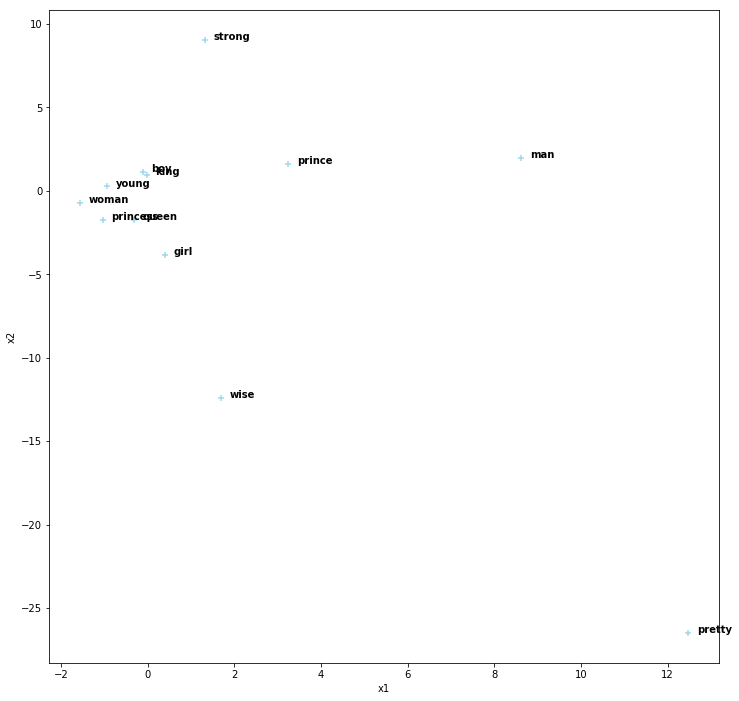

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
p1 = sns.regplot(data=w2v_df, x='x1', y='x2', fit_reg=False, marker='+', color='skyblue')
for line in range(0, w2v_df.shape[0]):
    p1.text(w2v_df.x1[line]+0.2, w2v_df.x2[line], w2v_df.word[line], 
            horizontalalignment='left', size='medium', color='black', weight='semibold')